In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import keras
from sklearn.linear_model import LogisticRegression

from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler


2022-11-12 23:03:22.618914: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('datathon_SC_ACN_22/orders.csv', delimiter=';')
t=pd.read_csv('datathon_SC_ACN_22/test.csv',delimiter=';')

In [3]:
from keras.layers import Dense, Dropout

In [4]:
df.corr()

,product_id,units,late_order
product_id,1.000000,0.003219,-0.004794
units,0.003219,1.000000,0.167888
late_order,-0.004794,0.167888,1.000000


In [5]:
df.value_counts(['origin_port'])

origin_port
Rotterdam      65191
Athens         25652
Barcelona      18561
BCN             2995
ATHENAS         1877
dtype: int64

In [6]:
df = df.replace('ATHENAS','Athens')
df = df.replace('BCN','Barcelona')

In [7]:
df.value_counts(['origin_port'])

origin_port
Rotterdam      65191
Athens         27529
Barcelona      21556
dtype: int64

In [8]:
df.value_counts(['customs_procedures'])

customs_procedures
CRF                   51477
DTD                   43484
DTP                   19315
dtype: int64

In [9]:
df_late = df[df['late_order'] == True]

In [10]:
df_late.reset_index(inplace=True)
del df_late['index']

In [11]:
(df_late['origin_port'] == 'Rotterdam').value_counts()

False    16125
True     11031
Name: origin_port, dtype: int64

In [12]:
# Percentage of orders arriving late from origin: Rotterdam
R1 = (df_late['origin_port'] == 'Rotterdam').value_counts()[True] #Orders arriving late
Rtot = (df['origin_port'] == 'Rotterdam').value_counts()[True].sum() #Total orders
R1 / Rtot

0.16921047383841328

In [13]:
# Percentage of orders arriving late from origin: Barcelona
B1 = (df_late['origin_port'] == 'Barcelona').value_counts()[True]
Btot = (df['origin_port'] == 'Barcelona').value_counts()[True].sum()
B1 / Btot

0.2702263870848024

In [14]:
# Percentage of orders arriving late from origin: Athens
A1 = (df_late['origin_port'] == 'Athens').value_counts()[True]
Atot = (df['origin_port'] == 'Athens').value_counts()[True].sum()
A1 / Atot

0.3741508954193759

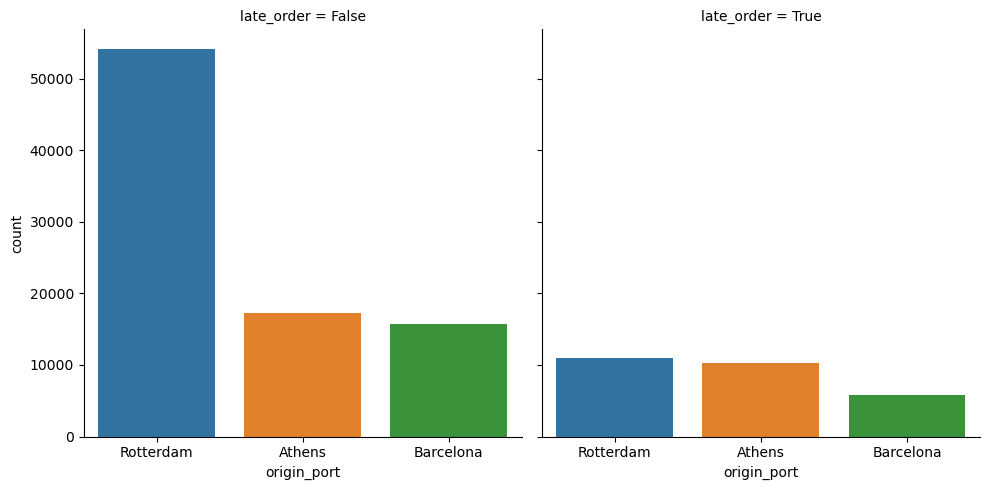

In [15]:
sns.catplot(x='origin_port',
            col='late_order',
            kind='count',
            data=df)

In [16]:
df.value_counts(['customs_procedures'])

customs_procedures
CRF                   51477
DTD                   43484
DTP                   19315
dtype: int64

In [17]:
CRF1 = (df_late['customs_procedures'] == 'CRF').value_counts()[True] #Orders arriving late
CRFtot = (df['customs_procedures'] == 'CRF').value_counts()[True].sum() #Total orders
CRF1 / CRFtot

0.19820502360277406

In [18]:
DTD1 = (df_late['customs_procedures'] == 'DTD').value_counts()[True] #Orders arriving late
DTDtot = (df['customs_procedures'] == 'DTD').value_counts()[True].sum() #Total orders
DTD1 / DTDtot

0.25149480268604546

In [19]:
DTP1 = (df_late['customs_procedures'] == 'DTP').value_counts()[True] #Orders arriving late
DTPtot = (df['customs_procedures'] == 'DTP').value_counts()[True].sum() #Total orders
DTP1 / DTPtot

0.3115195443955475

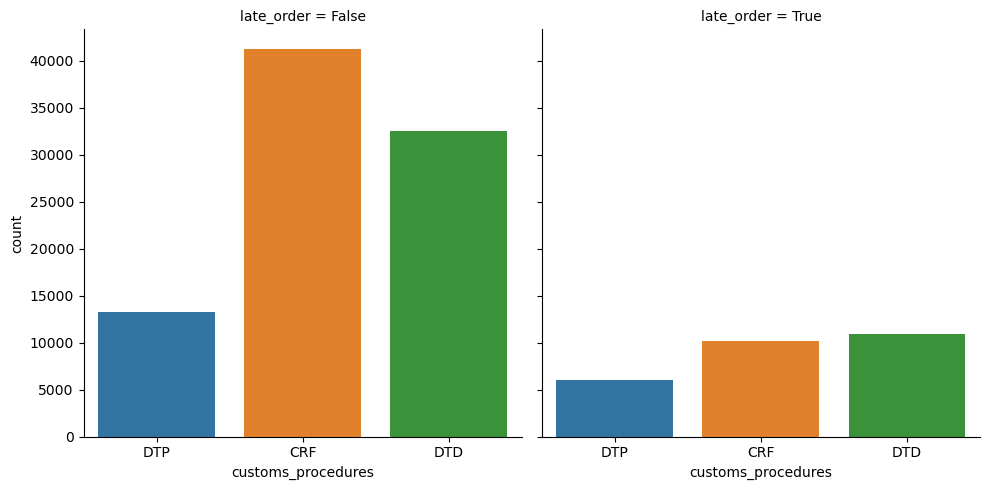

In [20]:
sns.catplot(x='customs_procedures',
            col='late_order',
            kind='count',
            data=df)

In [21]:
df.value_counts(['logistic_hub'])

logistic_hub
Venlo           23700
Hamburg         21480
Warsaw          15803
Dusseldorf      12518
Rome            12460
Lille           10248
Zaragoza         7886
Liege            4641
Bratislava       4491
dtype: int64

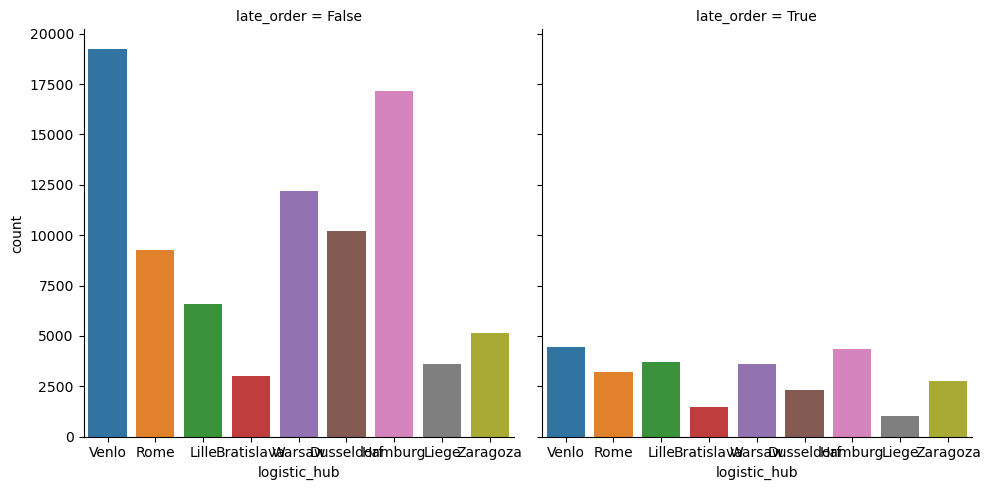

In [22]:
sns.catplot(x='logistic_hub',
            col='late_order',
            kind='count',
            data=df)

In [23]:
df_cities = pd.read_csv('datathon_SC_ACN_22/cities_data.csv', delimiter=';')

In [24]:
df_cities

,city_from_name,city_to_name,city_from_coord,city_to_coord,distance
0,Dusseldorf,Zaragoza,"(51.2254018, 6.7763137)","(41.6521342, -0.8809428)",1214.4772
1,Dusseldorf,Venlo,"(51.2254018, 6.7763137)","(51.39244885, 6.1511724144122955)",47.3876
2,Dusseldorf,Bratislava,"(51.2254018, 6.7763137)","(48.1516988, 17.1093063)",819.2894
3,Dusseldorf,Hamburg,"(51.2254018, 6.7763137)","(53.550341, 10.000654)",339.2215
4,Dusseldorf,Rome,"(51.2254018, 6.7763137)","(41.8933203, 12.4829321)",1125.0290
...,...,...,...,...,...
661,Rotterdam,Helsinki,"(51.9244424, 4.47775)","(60.1674881, 24.9427473)",1560.6484
662,Rotterdam,Prague,"(51.9244424, 4.47775)","(50.0874654, 14.4212535)",726.5575
663,Rotterdam,Valencia,"(51.9244424, 4.47775)","(39.4697065, -0.3763353)",1434.1499
664,Rotterdam,Bremen,"(51.9244424, 4.47775)","(53.0758196, 8.8071646)",320.6459


In [25]:
df_cities = df_cities.rename({'city_from_name':'logistic_hub'}, axis='columns')
df_cities = df_cities.rename({'city_to_name':'customer'}, axis='columns')

In [26]:
df_cities

,logistic_hub,customer,city_from_coord,city_to_coord,distance
0,Dusseldorf,Zaragoza,"(51.2254018, 6.7763137)","(41.6521342, -0.8809428)",1214.4772
1,Dusseldorf,Venlo,"(51.2254018, 6.7763137)","(51.39244885, 6.1511724144122955)",47.3876
2,Dusseldorf,Bratislava,"(51.2254018, 6.7763137)","(48.1516988, 17.1093063)",819.2894
3,Dusseldorf,Hamburg,"(51.2254018, 6.7763137)","(53.550341, 10.000654)",339.2215
4,Dusseldorf,Rome,"(51.2254018, 6.7763137)","(41.8933203, 12.4829321)",1125.0290
...,...,...,...,...,...
661,Rotterdam,Helsinki,"(51.9244424, 4.47775)","(60.1674881, 24.9427473)",1560.6484
662,Rotterdam,Prague,"(51.9244424, 4.47775)","(50.0874654, 14.4212535)",726.5575
663,Rotterdam,Valencia,"(51.9244424, 4.47775)","(39.4697065, -0.3763353)",1434.1499
664,Rotterdam,Bremen,"(51.9244424, 4.47775)","(53.0758196, 8.8071646)",320.6459


In [27]:
df

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order
0,366c7a3d298f,Rotterdam,v_002,DTP,Venlo,Marseille,1692723,583,True
1,45f906331e10,Rotterdam,v_004,CRF,Rome,Marseille,1644308,459,False
2,ac84a6e4af0f,Athens,v_002,CRF,Venlo,Paris,1684170,464,True
3,f5e98cb29790,Rotterdam,v_004,CRF,Lille,Milan,1620510,678,False
4,a9e7c9bee35b,Barcelona,v_002,CRF,Venlo,Berlin,1699372,353,False
...,...,...,...,...,...,...,...,...,...
114271,3f4b15fb770e,Rotterdam,v_002,CRF,Dusseldorf,Bordeaux,1681376,645,False
114272,d2e6978a38fd,Barcelona,v_004,DTD,Dusseldorf,Berlin,1676942,502,False
114273,b88babd5c7bd,Rotterdam,v_002,DTP,Dusseldorf,Rome,1692737,464,False
114274,b0b5c761613f,Barcelona,v_003,DTD,Dusseldorf,Munich,1699974,388,False


In [28]:
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   logistic_hub     666 non-null    object 
 1   customer         666 non-null    object 
 2   city_from_coord  666 non-null    object 
 3   city_to_coord    666 non-null    object 
 4   distance         666 non-null    float64
dtypes: float64(1), object(4)
memory usage: 26.1+ KB


In [29]:
df_m = df.merge(df_cities, how='left', on=['logistic_hub', 'customer']) #Left 3526615 #Right 3525953 # 3525566

In [30]:
df_m

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order,city_from_coord,city_to_coord,distance
0,366c7a3d298f,Rotterdam,v_002,DTP,Venlo,Marseille,1692723,583,True,"(51.39244885, 6.1511724144122955)","(43.2961743, 5.3699525)",902.0420
1,45f906331e10,Rotterdam,v_004,CRF,Rome,Marseille,1644308,459,False,"(41.8933203, 12.4829321)","(43.2961743, 5.3699525)",604.0216
2,ac84a6e4af0f,Athens,v_002,CRF,Venlo,Paris,1684170,464,True,"(51.39244885, 6.1511724144122955)","(48.8588897, 2.3200410217200766)",392.9249
3,f5e98cb29790,Rotterdam,v_004,CRF,Lille,Milan,1620510,678,False,"(50.6365654, 3.0635282)","(45.4641943, 9.1896346)",733.8784
4,a9e7c9bee35b,Barcelona,v_002,CRF,Venlo,Berlin,1699372,353,False,"(51.39244885, 6.1511724144122955)","(52.5170365, 13.3888599)",512.8188
...,...,...,...,...,...,...,...,...,...,...,...,...
114271,3f4b15fb770e,Rotterdam,v_002,CRF,Dusseldorf,Bordeaux,1681376,645,False,"(51.2254018, 6.7763137)","(44.841225, -0.5800364)",896.2065
114272,d2e6978a38fd,Barcelona,v_004,DTD,Dusseldorf,Berlin,1676942,502,False,"(51.2254018, 6.7763137)","(52.5170365, 13.3888599)",477.3717
114273,b88babd5c7bd,Rotterdam,v_002,DTP,Dusseldorf,Rome,1692737,464,False,"(51.2254018, 6.7763137)","(41.8933203, 12.4829321)",1125.0290
114274,b0b5c761613f,Barcelona,v_003,DTD,Dusseldorf,Munich,1699974,388,False,"(51.2254018, 6.7763137)","(48.1371079, 11.5753822)",487.5926


In [31]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114276 entries, 0 to 114275
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   order_id            114276 non-null  object 
 1   origin_port         114276 non-null  object 
 2   3pl                 114276 non-null  object 
 3   customs_procedures  114276 non-null  object 
 4   logistic_hub        113227 non-null  object 
 5   customer            114276 non-null  object 
 6   product_id          114276 non-null  int64  
 7   units               114276 non-null  int64  
 8   late_order          114276 non-null  bool   
 9   city_from_coord     111745 non-null  object 
 10  city_to_coord       111745 non-null  object 
 11  distance            111745 non-null  float64
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 10.6+ MB


In [32]:
# df_m['3pl'] = [x[4] for x in df_m['3pl']]
# df_m['3pl'] = df_m['3pl'].astype(int)


df_m['3pl'] = df_m['3pl'].astype('category')
df_m['3pl'] =df_m['3pl'].cat.codes
df_m['3pl'].value_counts()

df_m['logistic_hub'] = df_m['logistic_hub'].astype('category')
df_m['logistic_hub'] =df_m['logistic_hub'].cat.codes
df_m['logistic_hub'].value_counts()


df_m['customer'] = df_m['customer'].astype('category')
df_m['customer'] =df_m['customer'].cat.codes
df_m['customer'].value_counts()



3     9819
17    9670
14    9231
27    7080
20    6606
18    6047
0     5413
24    4926
9     4877
13    4863
2     4386
8     3904
23    3860
16    3842
6     3352
1     3143
7     2720
19    2680
10    2250
15    2163
25    2143
12    2110
26    1638
4     1621
22    1620
5     1612
11    1588
21    1112
Name: customer, dtype: int64

In [33]:
df_m

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order,city_from_coord,city_to_coord,distance
0,366c7a3d298f,Rotterdam,1,DTP,6,16,1692723,583,True,"(51.39244885, 6.1511724144122955)","(43.2961743, 5.3699525)",902.0420
1,45f906331e10,Rotterdam,3,CRF,5,16,1644308,459,False,"(41.8933203, 12.4829321)","(43.2961743, 5.3699525)",604.0216
2,ac84a6e4af0f,Athens,1,CRF,6,20,1684170,464,True,"(51.39244885, 6.1511724144122955)","(48.8588897, 2.3200410217200766)",392.9249
3,f5e98cb29790,Rotterdam,3,CRF,4,17,1620510,678,False,"(50.6365654, 3.0635282)","(45.4641943, 9.1896346)",733.8784
4,a9e7c9bee35b,Barcelona,1,CRF,6,3,1699372,353,False,"(51.39244885, 6.1511724144122955)","(52.5170365, 13.3888599)",512.8188
...,...,...,...,...,...,...,...,...,...,...,...,...
114271,3f4b15fb770e,Rotterdam,1,CRF,1,4,1681376,645,False,"(51.2254018, 6.7763137)","(44.841225, -0.5800364)",896.2065
114272,d2e6978a38fd,Barcelona,3,DTD,1,3,1676942,502,False,"(51.2254018, 6.7763137)","(52.5170365, 13.3888599)",477.3717
114273,b88babd5c7bd,Rotterdam,1,DTP,1,23,1692737,464,False,"(51.2254018, 6.7763137)","(41.8933203, 12.4829321)",1125.0290
114274,b0b5c761613f,Barcelona,2,DTD,1,18,1699974,388,False,"(51.2254018, 6.7763137)","(48.1371079, 11.5753822)",487.5926


In [34]:
df_merged = df_m.replace('Athens', 0)
df_merged = df_merged.replace('Barcelona', 1)
df_merged = df_merged.replace('Rotterdam', 2)

In [35]:
# df_merged

In [36]:
df_merged = df_merged.replace('DTP', 0)
df_merged = df_merged.replace('DTD', 1)
df_merged = df_merged.replace('CRF', 2)


df_merged

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order,city_from_coord,city_to_coord,distance
0,366c7a3d298f,2,1,0,6,16,1692723,583,True,"(51.39244885, 6.1511724144122955)","(43.2961743, 5.3699525)",902.0420
1,45f906331e10,2,3,2,5,16,1644308,459,False,"(41.8933203, 12.4829321)","(43.2961743, 5.3699525)",604.0216
2,ac84a6e4af0f,0,1,2,6,20,1684170,464,True,"(51.39244885, 6.1511724144122955)","(48.8588897, 2.3200410217200766)",392.9249
3,f5e98cb29790,2,3,2,4,17,1620510,678,False,"(50.6365654, 3.0635282)","(45.4641943, 9.1896346)",733.8784
4,a9e7c9bee35b,1,1,2,6,3,1699372,353,False,"(51.39244885, 6.1511724144122955)","(52.5170365, 13.3888599)",512.8188
...,...,...,...,...,...,...,...,...,...,...,...,...
114271,3f4b15fb770e,2,1,2,1,4,1681376,645,False,"(51.2254018, 6.7763137)","(44.841225, -0.5800364)",896.2065
114272,d2e6978a38fd,1,3,1,1,3,1676942,502,False,"(51.2254018, 6.7763137)","(52.5170365, 13.3888599)",477.3717
114273,b88babd5c7bd,2,1,0,1,23,1692737,464,False,"(51.2254018, 6.7763137)","(41.8933203, 12.4829321)",1125.0290
114274,b0b5c761613f,1,2,1,1,18,1699974,388,False,"(51.2254018, 6.7763137)","(48.1371079, 11.5753822)",487.5926


In [37]:
df_merged

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order,city_from_coord,city_to_coord,distance
0,366c7a3d298f,2,1,0,6,16,1692723,583,True,"(51.39244885, 6.1511724144122955)","(43.2961743, 5.3699525)",902.0420
1,45f906331e10,2,3,2,5,16,1644308,459,False,"(41.8933203, 12.4829321)","(43.2961743, 5.3699525)",604.0216
2,ac84a6e4af0f,0,1,2,6,20,1684170,464,True,"(51.39244885, 6.1511724144122955)","(48.8588897, 2.3200410217200766)",392.9249
3,f5e98cb29790,2,3,2,4,17,1620510,678,False,"(50.6365654, 3.0635282)","(45.4641943, 9.1896346)",733.8784
4,a9e7c9bee35b,1,1,2,6,3,1699372,353,False,"(51.39244885, 6.1511724144122955)","(52.5170365, 13.3888599)",512.8188
...,...,...,...,...,...,...,...,...,...,...,...,...
114271,3f4b15fb770e,2,1,2,1,4,1681376,645,False,"(51.2254018, 6.7763137)","(44.841225, -0.5800364)",896.2065
114272,d2e6978a38fd,1,3,1,1,3,1676942,502,False,"(51.2254018, 6.7763137)","(52.5170365, 13.3888599)",477.3717
114273,b88babd5c7bd,2,1,0,1,23,1692737,464,False,"(51.2254018, 6.7763137)","(41.8933203, 12.4829321)",1125.0290
114274,b0b5c761613f,1,2,1,1,18,1699974,388,False,"(51.2254018, 6.7763137)","(48.1371079, 11.5753822)",487.5926


In [38]:
df_merged['distance']

0          902.0420
1          604.0216
2          392.9249
3          733.8784
4          512.8188
            ...    
114271     896.2065
114272     477.3717
114273    1125.0290
114274     487.5926
114275    1672.4754
Name: distance, Length: 114276, dtype: float64

In [39]:
df_prod = pd.read_csv('datathon_SC_ACN_22/product_attributes.csv')
df_prod

,product_id,weight,material_handling
0,1672707,2876,3
1,1694456,2785,5
2,1682865,2751,3
3,1689146,2736,0
4,1664069,2707,4
...,...,...,...
767,1682793,162,0
768,1683403,161,1
769,1699799,153,3
770,1699768,139,5


In [40]:
df_m2 = df_merged.merge(df_prod, on='product_id', how='left')
df_m2

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order,city_from_coord,city_to_coord,distance,weight,material_handling
0,366c7a3d298f,2,1,0,6,16,1692723,583,True,"(51.39244885, 6.1511724144122955)","(43.2961743, 5.3699525)",902.0420,1778.0,5.0
1,45f906331e10,2,3,2,5,16,1644308,459,False,"(41.8933203, 12.4829321)","(43.2961743, 5.3699525)",604.0216,1088.0,3.0
2,ac84a6e4af0f,0,1,2,6,20,1684170,464,True,"(51.39244885, 6.1511724144122955)","(48.8588897, 2.3200410217200766)",392.9249,505.0,4.0
3,f5e98cb29790,2,3,2,4,17,1620510,678,False,"(50.6365654, 3.0635282)","(45.4641943, 9.1896346)",733.8784,1308.0,4.0
4,a9e7c9bee35b,1,1,2,6,3,1699372,353,False,"(51.39244885, 6.1511724144122955)","(52.5170365, 13.3888599)",512.8188,1465.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114271,3f4b15fb770e,2,1,2,1,4,1681376,645,False,"(51.2254018, 6.7763137)","(44.841225, -0.5800364)",896.2065,1896.0,3.0
114272,d2e6978a38fd,1,3,1,1,3,1676942,502,False,"(51.2254018, 6.7763137)","(52.5170365, 13.3888599)",477.3717,746.0,1.0
114273,b88babd5c7bd,2,1,0,1,23,1692737,464,False,"(51.2254018, 6.7763137)","(41.8933203, 12.4829321)",1125.0290,572.0,5.0
114274,b0b5c761613f,1,2,1,1,18,1699974,388,False,"(51.2254018, 6.7763137)","(48.1371079, 11.5753822)",487.5926,1894.0,1.0


In [41]:
df_m2['product_id'] = df_m2['product_id'].astype('category')
df_m2['product_id'] =df_m2['product_id'].cat.codes
df_m2['product_id'].value_counts()


df_m2['late_order'] = df_m2['late_order'].astype('category')
df_m2['late_order'] =df_m2['late_order'].cat.codes
df_m2['late_order'].value_counts()




0    87120
1    27156
Name: late_order, dtype: int64

In [42]:
y = df_m2['late_order']
del df_m2['late_order']

In [43]:
del df_m2['city_from_coord']
del df_m2['city_to_coord']

In [44]:
data = df_m2.join(y)

In [45]:
data

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,distance,weight,material_handling,late_order
0,366c7a3d298f,2,1,0,6,16,505,583,902.0420,1778.0,5.0,1
1,45f906331e10,2,3,2,5,16,24,459,604.0216,1088.0,3.0,0
2,ac84a6e4af0f,0,1,2,6,20,370,464,392.9249,505.0,4.0,1
3,f5e98cb29790,2,3,2,4,17,5,678,733.8784,1308.0,4.0,0
4,a9e7c9bee35b,1,1,2,6,3,644,353,512.8188,1465.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
114271,3f4b15fb770e,2,1,2,1,4,280,645,896.2065,1896.0,3.0,0
114272,d2e6978a38fd,1,3,1,1,3,245,502,477.3717,746.0,1.0,0
114273,b88babd5c7bd,2,1,0,1,23,508,464,1125.0290,572.0,5.0,0
114274,b0b5c761613f,1,2,1,1,18,726,388,487.5926,1894.0,1.0,0


In [46]:
def norm(x):
    a = (x-x.min())/(x.max()-x.min())
    return a

In [47]:
data['distance'] = norm(data['distance'])
data['weight'] = norm(data['weight'])
data['units'] = norm(data['units'])


In [48]:
data

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,distance,weight,material_handling,late_order
0,366c7a3d298f,2,1,0,6,16,505,0.612632,0.317280,0.599270,5.0,1
1,45f906331e10,2,3,2,5,16,24,0.482105,0.208296,0.347445,3.0,0
2,ac84a6e4af0f,0,1,2,6,20,370,0.487368,0.131099,0.134672,4.0,1
3,f5e98cb29790,2,3,2,4,17,5,0.712632,0.255783,0.427737,4.0,0
4,a9e7c9bee35b,1,1,2,6,3,644,0.370526,0.174944,0.485036,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
114271,3f4b15fb770e,2,1,2,1,4,280,0.677895,0.315146,0.642336,3.0,0
114272,d2e6978a38fd,1,3,1,1,3,245,0.527368,0.161981,0.222628,1.0,0
114273,b88babd5c7bd,2,1,0,1,23,508,0.487368,0.398824,0.159124,5.0,0
114274,b0b5c761613f,1,2,1,1,18,726,0.407368,0.165719,0.641606,1.0,0


In [49]:
#data.to_csv('train.csv', index=True, sep='\t')

In [50]:
del data['weight']
del data['material_handling']
del data['distance']

In [51]:
data1=data.dropna().reset_index(drop=True)
data2=data1.iloc[:,[1,2,3,4,5,7]]
y=data1['late_order']

In [52]:
Xtr,Xv,ytr,yv=train_test_split(data2,y,test_size=0.2,random_state=2)

In [53]:
scaler= StandardScaler().fit(Xtr)
Xtr = scaler.transform(Xtr)
Xv = scaler.transform(Xv)

In [54]:
Xtr.shape

(91420, 6)

In [73]:
#model = Sequential()

# model = keras.Sequential([
#     Dense(32, activation='relu',input_shape=(7,)),
#     Dense(64, activation='relu'),
#     Dropout(0.2),
#     Dense(64, activation='relu'),
#     Dropout(0.2),
#     Dense(32, activation='relu'),
#     Dense(32, activation='relu'),
#     Dense(1, activation='softmax'),
# ])

# import BatchNormalization
from tensorflow.keras.layers import BatchNormalization, Conv1D

# instantiate model
model = Sequential()
model.add(Dense(32, input_dim=6, activation='relu')
model.add(Dropout(0.2))

# we can think of this chunk as the hidden layer    
model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2))

# we can think of this chunk as the output layer
model.add(Dense(32, activation='relu', kernel_initializer='glorot_uniform'))
#model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))


SyntaxError: invalid syntax (3144476362.py, line 20)

In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [65]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))



In [66]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])


In [67]:
# fit the model
history = model.fit(Xtr, ytr, validation_split=0.2, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
572/572 [==============================] - 3s 2ms/step - loss: 0.4873 - acc: 0.7779 - f1_m: 0.2470 - precision_m: 0.6257 - recall_m: 0.1568 - val_loss: 0.4877 - val_acc: 0.7786 - val_f1_m: 0.2374 - val_precision_m: 0.6681 - val_recall_m: 0.1479
Epoch 2/20
572/572 [==============================] - 1s 2ms/step - loss: 0.4870 - acc: 0.7773 - f1_m: 0.2478 - precision_m: 0.6130 - recall_m: 0.1583 - val_loss: 0.4906 - val_acc: 0.7771 - val_f1_m: 0.2276 - val_precision_m: 0.6672 - val_recall_m: 0.1406
Epoch 3/20
572/572 [==============================] - 1s 2ms/step - loss: 0.4878 - acc: 0.7777 - f1_m: 0.2466 - precision_m: 0.6199 - recall_m: 0.1570 - val_loss: 0.4896 - val_acc: 0.7779 - val_f1_m: 0.2310 - val_precision_m: 0.6739 - val_recall_m: 0.1429
Epoch 4/20
572/572 [==============================] - 1s 2ms/step - loss: 0.4877 - acc: 0.7779 - f1_m: 0.2475 - precision_m: 0.6210 - recall_m: 0.1573 - val_loss: 0.4886 - val_acc: 0.7781 - val_f1_m: 0.2418 - val_precision_m: 0.6585

In [68]:

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(Xv, yv, verbose=0)

In [69]:
loss, accuracy, f1_score

(0.4944418966770172, 0.7730136513710022, 0.18747437000274658)

In [ ]:
history = model.fit(Xtr,ytr, validation_split=0.2, batch_size=64, epochs=30, verbose=1)

In [ ]:
test_loss,test_accuracy = model.evaluate(Xv,yv,verbose=2)
print('Accuracy on test dataset:',test_accuracy)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Drop row that has all NaN values
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(Xtr,ytr)
y_pred=clf.predict(Xtr)

In [ ]:
accuracy=clf.score(Xv,yv)

In [ ]:
print(accuracy)

In [ ]:
log_reg=LogisticRegression(multi_class='ovr')
log_reg.fit(Xtr,ytr)
print(log_reg.score(Xtr,ytr))

In [ ]:
y_pred=log_reg.predict(Xtr)

In [ ]:
y_predv=log_reg.predict(Xv)